In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
def GetNewarkRacePopulation():
    population_df = pd.read_csv('Housing_Data_Input/Census Data/TotalPopulation.csv', encoding='utf-8')
    population_df = population_df.reset_index()
    population_df['Label'] = population_df['Label'].str.strip()

    race_lst = ['Total Population', 'White','American Indian', 'African American','Native Hawaiian and Other Pacific Islander', 'Asian','Some other race','Two or more races']
    population_lst=[]
    population_percentage_lst = []

    #Find population count by race 
    population_lst.append(population_df.loc[population_df['Label'] == 'Total population','Newark city, New Jersey!!Estimate'].iloc[0])
    population_lst.append(population_df.loc[population_df['Label'] == 'White','Newark city, New Jersey!!Estimate'].iloc[0])
    population_lst.append(population_df.loc[population_df['Label'] == 'American Indian and Alaska Native','Newark city, New Jersey!!Estimate'].iloc[0])
    population_lst.append(population_df.loc[population_df['Label'] == 'Black or African American','Newark city, New Jersey!!Estimate'].iloc[0])
    population_lst.append(population_df.loc[population_df['Label'] == 'Native Hawaiian and Other Pacific Islander','Newark city, New Jersey!!Estimate'].iloc[0])
    population_lst.append(population_df.loc[population_df['Label'] == 'Asian','Newark city, New Jersey!!Estimate'].iloc[0])
    population_lst.append(population_df.loc[population_df['Label'] == 'Some other race','Newark city, New Jersey!!Estimate'].iloc[0])
    population_lst.append(population_df.loc[population_df['Label'] == 'Two or more races','Newark city, New Jersey!!Estimate'].iloc[0])


    #Find percentage race 
    population_percentage_lst.append(0)
    population_percentage_lst.append(population_df.loc[population_df['Label'] == 'White','Newark city, New Jersey!!Percent'].iloc[0])
    population_percentage_lst.append(population_df.loc[population_df['Label'] == 'American Indian and Alaska Native','Newark city, New Jersey!!Percent'].iloc[0])
    population_percentage_lst.append(population_df.loc[population_df['Label'] == 'Black or African American','Newark city, New Jersey!!Percent'].iloc[0])
    population_percentage_lst.append(population_df.loc[population_df['Label'] == 'Native Hawaiian and Other Pacific Islander','Newark city, New Jersey!!Percent'].iloc[0])
    population_percentage_lst.append(population_df.loc[population_df['Label'] == 'Asian','Newark city, New Jersey!!Percent'].iloc[0])
    population_percentage_lst.append(population_df.loc[population_df['Label'] == 'Some other race','Newark city, New Jersey!!Percent'].iloc[0])
    population_percentage_lst.append(population_df.loc[population_df['Label'] == 'Two or more races','Newark city, New Jersey!!Percent'].iloc[0])




    newark_race_df = pd.DataFrame({
        'Race' : race_lst,
        'Count': population_lst,
        'Percentage': population_percentage_lst
    })

    return newark_race_df.head(10)

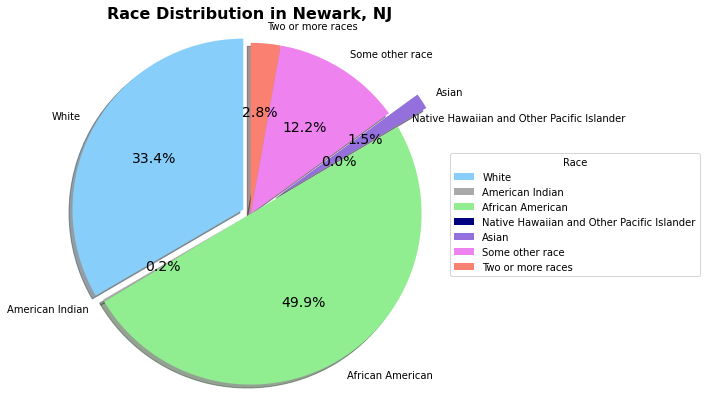

In [3]:
#Plot a Pie chart of the different race% in Newark, NJ

newark_race_df =GetNewarkRacePopulation()
labels = newark_race_df['Race']
del labels[0]

sizes = newark_race_df['Percentage']
del sizes[0]

sizes = [str(s).replace('%', '') for s in sizes]

color =['lightskyblue','darkgray','lightgreen','navy', 'mediumpurple','violet','salmon']
explode = (0.05, 0, 0, 0,0.2,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(7,7))

wedges, texts, autotexts = ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors =color)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.legend(wedges, labels,
          title="Race",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=14)

ax1.set_title("Race Distribution in Newark, NJ", size=16, weight="bold")

plt.show()

fig1.savefig('Housing_Output/Newark_RaceChart.png', bbox_inches="tight")

In [4]:
def getcitypopulation():
    population_df = pd.read_csv('Housing_Data_Input/Census Data/TotalPopulation.csv', encoding='utf-8')
    population_df = population_df.reset_index()
    total_population = population_df.loc[population_df['Label'] == 'Total population']
    return total_population['Newark city, New Jersey!!Estimate'].to_string(index=False)

In [5]:
def getcitymedianage():
    population_df = pd.read_csv('Housing_Data_Input/Census Data/TotalPopulation.csv', encoding='utf-8')
    population_df = population_df.reset_index()
    median_age = population_df.iloc[18,2]
    return median_age

In [6]:
total_population = getcitypopulation()
print(f"Newark Total Population: {total_population}")
print()
median_age = getcitymedianage()
print(f"Newark Median Age: {median_age} yrs")
print()
population_by_race = GetNewarkRacePopulation()
print(f"Newark population by Race:")
print(population_by_race)

Newark Total Population:  281,999

Newark Median Age: 34.6 yrs

Newark population by Race:
                                         Race    Count Percentage
0                            Total Population  281,999          0
1                                       White   94,067     33.40%
2                             American Indian      628      0.20%
3                            African American  140,648     49.90%
4  Native Hawaiian and Other Pacific Islander        0      0.00%
5                                       Asian    4,238      1.50%
6                             Some other race   34,540     12.20%
7                           Two or more races    7,878      2.80%


![10-State_Markers.png](../Images/10-State_Markers.png)

In [7]:
##Occupancy Charactersics

In [8]:
def GetHousingOccupancy2019(): 
    
    #Load the 2019 Occupancy data 
    occupancy_df_2019 = pd.read_csv('Housing_Data_Input/Census Data/Occupancy_Characterstics_2019.csv', encoding='utf-8')
    occupancy_df_2019['Label'] = occupancy_df_2019['Label'].str.strip()
    
    #Fetch required data from all data
    occupied_housing_units = occupancy_df_2019.loc[occupancy_df_2019['Label'] == 'Occupied housing units']
    occupied_units = (occupied_housing_units['Newark city, New Jersey!!Occupied housing units!!Estimate']).to_string(index=False),
    owner_occupied = (occupied_housing_units['Newark city, New Jersey!!Owner-occupied housing units!!Estimate']).to_string(index=False)
    renter_occupied = (occupied_housing_units['Newark city, New Jersey!!Renter-occupied housing units!!Estimate']).to_string(index=False)
    
    #Create DF with required columns 
    housing_occupancy_2019 =pd.DataFrame({
        '2019 OccupiedUnits':occupied_units,
        '2019 OwnerOccupied':owner_occupied,
        '2019 RenterOccupied': renter_occupied
    })
    
    return housing_occupancy_2019

In [9]:
def GetHousingOccupancy2018():
    #Load the 2018 Occupancy data 
    occupancy_df_2018 = pd.read_csv('Housing_Data_Input/Census Data/Occupancy_Characterstics_2018.csv', encoding='utf-8')
    occupancy_df_2018['Label'] = occupancy_df_2018['Label'].str.strip()
    
    #Fetch required data from all data
    
    occupied_units_2018 = occupancy_df_2018.loc[occupancy_df_2018['Label'] == 'Occupied housing units']
    occupied_2018 =occupied_units_2018['Newark city, Essex County, New Jersey!!Occupied housing units!!Estimate']
    owner_occupied2018 = occupied_units_2018['Newark city, Essex County, New Jersey!!Owner-occupied housing units!!Estimate'].to_string(index=False)
    renter_occupied2018 = occupied_units_2018['Newark city, Essex County, New Jersey!!Renter-occupied housing units!!Estimate'].to_string(index=False)
    
    #Create DF with required columns 
    housing_occupancy_2018 = pd.DataFrame({'2018 OccupiedUnits':occupied_2018,
        '2018 OwnerOccupied':owner_occupied2018,
        '2018 RenterOccupied': renter_occupied2018})
    
    return housing_occupancy_2018


In [10]:
def GetHousingOccupancy2017(): 
    #Load the 2017 Occupancy data
    occupancy_df_2017 = pd.read_csv('Housing_Data_Input/Census Data/Occupancy_Characterstics_2017.csv', encoding='utf-8')
    occupancy_df_2017['Label'] = occupancy_df_2017['Label'].str.strip()
    
    #Fetch required data from all data
    occupied_housing_units = occupancy_df_2017.loc[occupancy_df_2017['Label'] == 'Occupied housing units']
    occupied_units2017 = (occupied_housing_units['Newark city, Essex County, New Jersey!!Occupied housing units!!Estimate']).to_string(index=False),
    owner_occupied2017 = (occupied_housing_units['Newark city, Essex County, New Jersey!!Owner-occupied housing units!!Estimate']).to_string(index=False)
    renter_occupied2017 = (occupied_housing_units['Newark city, Essex County, New Jersey!!Renter-occupied housing units!!Estimate']).to_string(index=False)
    
    #Create DF with required columns
    housing_occupancy_2017 = pd.DataFrame({'2017 OccupiedUnits':occupied_units2017,
        '2017 OwnerOccupied':owner_occupied2017,
        '2017 RenterOccupied': renter_occupied2017})   
    return housing_occupancy_2017

In [11]:
def GetHousingOccupancy2016(): 
    
    #Load the 2016 Occupancy data 
    occupancy_df_2016 = pd.read_csv('Housing_Data_Input/Census Data/Occupancy_Characterstics_2016.csv', encoding='utf-8')
    occupancy_df_2016['Label'] = occupancy_df_2016['Label'].str.strip()

    #Fetch required data from all data
    occupied_housing_units = occupancy_df_2016.loc[occupancy_df_2016['Label'] == 'Occupied housing units']
    occupied_units = (occupied_housing_units['Newark city, New Jersey!!Occupied housing units!!Estimate']).to_string(index=False),
    owner_occupied = (occupied_housing_units['Newark city, New Jersey!!Owner-occupied housing units!!Estimate']).to_string(index=False)
    renter_occupied = (occupied_housing_units['Newark city, New Jersey!!Renter-occupied housing units!!Estimate']).to_string(index=False)

    #Create DF with required columns 
    housing_occupancy_2016 =pd.DataFrame({
            '2016 OccupiedUnits':occupied_units,
            '2016 OwnerOccupied':owner_occupied,
            '2016 RenterOccupied': renter_occupied
    })
    
    return housing_occupancy_2016

In [12]:
def GetHousingOccupancy2015(): 
    
    #Load the 2015 Occupancy data 
    occupancy_df_2015 = pd.read_csv('Housing_Data_Input/Census Data/Occupancy_Characterstics_2015.csv', encoding='utf-8')
    occupancy_df_2015['Label'] = occupancy_df_2015['Label'].str.strip()

    #Fetch required data from all data
    occupied_housing_units = occupancy_df_2015.loc[occupancy_df_2015['Label'] == 'Occupied housing units']
    occupied_units = (occupied_housing_units['Newark city, New Jersey!!Occupied housing units!!Estimate']).to_string(index=False),
    owner_occupied = (occupied_housing_units['Newark city, New Jersey!!Owner-occupied housing units!!Estimate']).to_string(index=False)
    renter_occupied = (occupied_housing_units['Newark city, New Jersey!!Renter-occupied housing units!!Estimate']).to_string(index=False)

    #Create DF with required columns 
    housing_occupancy_2015 =pd.DataFrame({
            '2015 OccupiedUnits':occupied_units,
            '2015 OwnerOccupied':owner_occupied,
            '2015 RenterOccupied': renter_occupied
    })
    
    return housing_occupancy_2015

In [13]:

print(GetHousingOccupancy2019())
print()
print(GetHousingOccupancy2018())
print()
print(GetHousingOccupancy2017())
print(GetHousingOccupancy2016())
print(GetHousingOccupancy2015())

  2019 OccupiedUnits 2019 OwnerOccupied 2019 RenterOccupied
0            102,155             24,634              77,521

  2018 OccupiedUnits 2018 OwnerOccupied 2018 RenterOccupied
0            101,689             22,305              79,384

  2017 OccupiedUnits 2017 OwnerOccupied 2017 RenterOccupied
0             98,678             24,896              73,782
  2016 OccupiedUnits 2016 OwnerOccupied 2016 RenterOccupied
0             99,576             20,839              78,737
  2015 OccupiedUnits 2015 OwnerOccupied 2015 RenterOccupied
0             98,524             20,490              78,034


In [14]:
def Get5Years_JerseytoNewarkHousingDetails(): 
    
    #Load the 2019,2018,2017 Newark to Jersey Housing Data
    housing_comparative = pd.read_csv('Housing_Data_Input/Census Data/ComparativeHousingCharacterstics.csv', encoding='utf-8')
    housing_comparative['Label'] = housing_comparative['Label'].str.strip()
    
    #Fetch required columns
    housing_comparative = housing_comparative[['Newark city, New Jersey!!2019 Estimate','Newark city, New Jersey!!2018 Estimate','Newark city, New Jersey!!2017 Estimate','Newark city, New Jersey!!2016 Estimate','Newark city, New Jersey!!2015 Estimate','New Jersey!!2019 Estimate','New Jersey!!2018 Estimate','New Jersey!!2017 Estimate','New Jersey!!2016 Estimate','New Jersey!!2015 Estimate']]
    housing_comparative = housing_comparative.iloc[1,:]
    
    #Create DF 
    housing_details = pd.DataFrame(housing_comparative)
    
    return housing_details

In [15]:


housing_5yr_df = Get5Years_JerseytoNewarkHousingDetails()
housing_lst = housing_5yr_df.iloc[0:5, 0].values.tolist()
housing_lst = [str(s).replace(',', '') for s in housing_lst]
housing_lst = list(map(int , housing_lst))
housing_lst = list(reversed(housing_lst))
print('Housing Count NJ State Vs Newark :')
print(Get5Years_JerseytoNewarkHousingDetails())


Housing Count NJ State Vs Newark :
                                                1
Newark city, New Jersey!!2019 Estimate    113,623
Newark city, New Jersey!!2018 Estimate    114,061
Newark city, New Jersey!!2017 Estimate    113,025
Newark city, New Jersey!!2016 Estimate    115,142
Newark city, New Jersey!!2015 Estimate    117,026
New Jersey!!2019 Estimate               3,641,854
New Jersey!!2018 Estimate               3,628,198
New Jersey!!2017 Estimate               3,615,891
New Jersey!!2016 Estimate               3,604,688
New Jersey!!2015 Estimate               3,593,722


In [16]:
#Get occupancy details for 5 years
df_2019 = GetHousingOccupancy2019()
df_2018 = GetHousingOccupancy2018()
df_2017 = GetHousingOccupancy2017()
df_2016 = GetHousingOccupancy2016()
df_2015 = GetHousingOccupancy2015()

#List initialization for Occupancy details
occupiedunits_count=[]
owneroccupied_count = []
renteroccupied_count = []

occupiedunits_count.append(df_2015['2015 OccupiedUnits'].loc[0])
occupiedunits_count.append(df_2016['2016 OccupiedUnits'].loc[0])
occupiedunits_count.append(df_2017['2017 OccupiedUnits'].loc[0])
occupiedunits_count.append(df_2018['2018 OccupiedUnits'].loc[0])
occupiedunits_count.append(df_2019['2019 OccupiedUnits'].loc[0])


occupiedunits_count = [s.replace( ',' , '') for s in occupiedunits_count]
occupiedunits_count = list(map(int , occupiedunits_count))

print(f'Total occupied units: {occupiedunits_count}')

owneroccupied_count.append(df_2015['2015 OwnerOccupied'].loc[0])
owneroccupied_count.append(df_2016['2016 OwnerOccupied'].loc[0])
owneroccupied_count.append(df_2017['2017 OwnerOccupied'].loc[0])
owneroccupied_count.append(df_2018['2018 OwnerOccupied'].loc[0])
owneroccupied_count.append(df_2019['2019 OwnerOccupied'].loc[0])
owneroccupied_count = [s.replace( ',' , '') for s in owneroccupied_count]
owneroccupied_count = list(map(int , owneroccupied_count))
print(f"Owner occupied: {owneroccupied_count}")



renteroccupied_count.append(df_2015['2015 RenterOccupied'].loc[0])
renteroccupied_count.append(df_2016['2016 RenterOccupied'].loc[0])
renteroccupied_count.append(df_2017['2017 RenterOccupied'].loc[0])
renteroccupied_count.append(df_2018['2018 RenterOccupied'].loc[0])
renteroccupied_count.append(df_2019['2019 RenterOccupied'].loc[0])
renteroccupied_count = [s.replace( ',' , '') for s in renteroccupied_count]
renteroccupied_count = list(map(int , renteroccupied_count))
print(f'Renter occupied units: {renteroccupied_count}')


Total occupied units: [98524, 99576, 98678, 101689, 102155]
Owner occupied: [20490, 20839, 24896, 22305, 24634]
Renter occupied units: [78034, 78737, 73782, 79384, 77521]


In [17]:
#Get Housing details count over last 5 years
housing_5yr_df = Get5Years_JerseytoNewarkHousingDetails()
housing_lst = housing_5yr_df.iloc[0:5, 0].values.tolist()
housing_lst = [str(s).replace(',', '') for s in housing_lst]
housing_lst = list(map(int , housing_lst))
housing_lst = list(reversed(housing_lst))
print(housing_lst)

[117026, 115142, 113025, 114061, 113623]


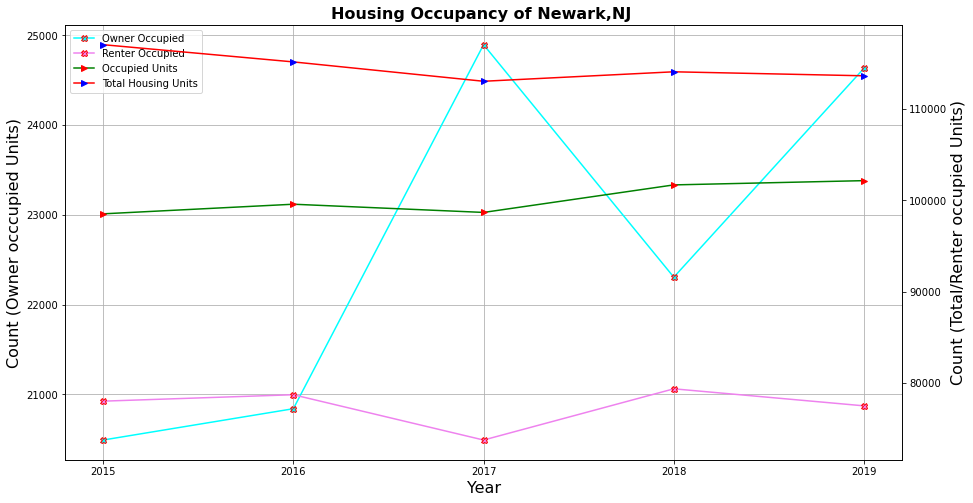

In [18]:
#Plot line graph of Occupancy details-Renter/Owner occupied and Housing count from year 2015-2019

year=[2015,2016,2017,2018,2019]

fig = plt.figure(figsize=(15,8))
axis_1 = fig.add_subplot(111)
axis_1. plot(year, owneroccupied_count, marker='X',markeredgecolor ='red', markersize=6, label='Owner Occupied', color='cyan')

axis_2 = axis_1.twinx()
axis_2. plot(year, renteroccupied_count, marker='X',markeredgecolor ='red', markersize=6, label='Renter Occupied', color='violet')
axis_2. plot(year, occupiedunits_count, marker='>' ,markerfacecolor  ='red', markeredgecolor ='red' ,markersize=6,  label='Occupied Units', color='green')
axis_2. plot(year, housing_lst, marker='>', markerfacecolor  ='blue', markeredgecolor  ='blue', markersize=6, label='Total Housing Units', color='red')


axis_1.grid()


lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
axis_1.legend(lines, labels, loc=0)


plt.title('Housing Occupancy of Newark,NJ ',fontsize=16, weight="bold")
axis_1.set_xlabel('Year',fontsize=16)
axis_1.set_ylabel('Count (Owner occcupied Units)',fontsize=16)

axis_2.set_ylabel('Count (Total/Renter occupied Units)',fontsize=16)

plt.xticks(year)
plt.show()


fig.savefig('Housing_Output/HousingOccupancy.png', bbox_inches="tight")

In [19]:
##Geographical Mobility


In [20]:
def GeographicalMobilityDetails_NJ5Years():     
    
    #Load last 5 years Newark Geographical Mobility Data
    
    geographical_mobility = pd.read_csv('Housing_Data_Input/Census Data/Geographical_Mobility_2015_2019.csv', encoding='utf-8')
    geographical_mobility['Label'] = geographical_mobility['Label'].str.strip()
    geographical_mobility = geographical_mobility.iloc[0,:]
    
    #Fetch required columns
    geographical_mobility_newjersey = geographical_mobility[['New Jersey 2019!!Estimate','New Jersey 2018!!Estimate','New Jersey 2017!!Estimate','New Jersey 2016!!Estimate','New Jersey 2015!!Estimate']]

    nj_geographical_mobility = pd.DataFrame({'New Jersey2019':[geographical_mobility_newjersey[0]],
              'New Jersey2018':geographical_mobility_newjersey[1],
              'New Jersey2017':geographical_mobility_newjersey[2],
              'New Jersey2016':geographical_mobility_newjersey[3],
              'New Jersey2015':geographical_mobility_newjersey[4]})

     
    return nj_geographical_mobility

In [21]:
def GeographicalMobilityDetails_Newark5Years():     
    
    #Load last 5 years Newark Geographical Mobility Data
    
    geographical_mobility = pd.read_csv('Housing_Data_Input/Census Data/Geographical_Mobility_2015_2019.csv', encoding='utf-8')
    geographical_mobility['Label'] = geographical_mobility['Label'].str.strip()
    geographical_mobility = geographical_mobility.iloc[0,:]
    
    #Fetch required columns
    geographical_mobility_newark = geographical_mobility[['Newark city, New Jersey 2019!!Estimate','Newark city, New Jersey 2018!!Estimate','Newark city, New Jersey 2017!!Estimate','Newark city, New Jersey 2016!!Estimate','Newark city, New Jersey 2015!!Estimate']]
  
    newark_geographical_mobility = pd.DataFrame({'Newark2019':[geographical_mobility_newark[0]],
              'Newark2018':geographical_mobility_newark[1],
              'Newark2017':geographical_mobility_newark[2],
              'Newark2016':geographical_mobility_newark[3],
              'Newark2015':geographical_mobility_newark[4]})
    
    return newark_geographical_mobility

In [22]:
print(GeographicalMobilityDetails_NJ5Years())
print(GeographicalMobilityDetails_Newark5Years())

  New Jersey2019 New Jersey2018 New Jersey2017 New Jersey2016 New Jersey2015
0      8,791,672      8,815,804      8,910,191      8,852,286      8,854,363
  Newark2019 Newark2018 Newark2017 Newark2016 Newark2015
0    278,212    278,557    281,796    278,872    278,833


In [23]:
#Plot Chart
x_axis= [2015,2016,2017,2018,2019]

df_nj =GeographicalMobilityDetails_NJ5Years()

df_nw =GeographicalMobilityDetails_Newark5Years()

labels = [2015,2016,2017,2018,2019]
nj_mobility =  df_nj.loc[0, :].values.tolist() 
nj_mobility = [s.replace(',', '') for s in nj_mobility]
nj_mobility = list(map(float, nj_mobility))

nw_mobility =  df_nw.loc[0, :].values.tolist()
nw_mobility = [s.replace(',', '') for s in nw_mobility]
nw_mobility = list(map(float, nw_mobility))
    

#Find the percentage of geographical mobility in Newark city and put it in new list

nw_mob_percent_lst=[]
i=0
for val in nw_mobility:
    nw_mob_percent_lst.append((val/nj_mobility[i] * 100))
    i += 1
    
np_array = np.array(nw_mob_percent_lst)
np_round_to_tenths = np.around(np_array, 2)
nw_mob_percent_lst = list(np_round_to_tenths) 

#Reversed the list for values from 2015-2019
nj_mobility= list(reversed(nj_mobility))
nw_mobility = list(reversed(nw_mobility))

#Clean up the unwanted characters
nj_mobility = [str(s).replace('.', '') for s in nj_mobility]
nj_mobility = list(map(int , nj_mobility))

nw_mobility = [str(s).replace('.', '') for s in nw_mobility]
nw_mobility = list(map(int , nw_mobility))

print(nj_mobility)
print(nw_mobility)

[88543630, 88522860, 89101910, 88158040, 87916720]
[2788330, 2788720, 2817960, 2785570, 2782120]


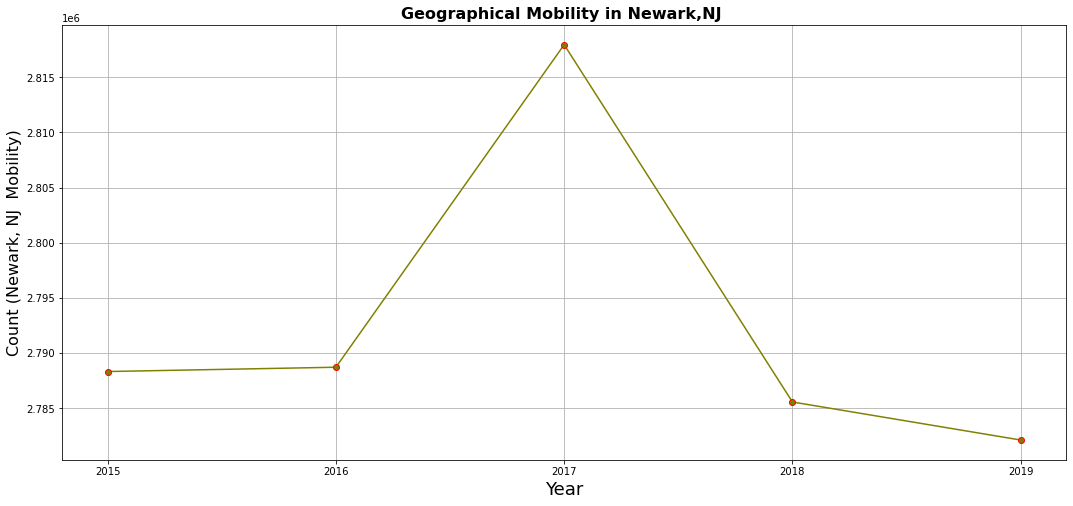

In [24]:
year=[2015,2016,2017,2018,2019]

fig = plt.figure(figsize=(18,8))
axis_1 = fig.add_subplot(111)

axis_1. plot(year, nw_mobility, marker='o',markeredgecolor  ='red', color='olive')


axis_1.grid()

axis_1.set_xlabel('Year',fontsize=18)
axis_1.set_ylabel('Count (Newark, NJ  Mobility)',fontsize=16)


plt.xticks(year)
plt.title('Geographical Mobility in Newark,NJ ',fontsize=16, weight="bold")
plt.show()

fig.savefig('Housing_Output/5YearGeographicalMobility.png', bbox_inches="tight")

In [25]:
 #Load last 5 years Property value share for NewJersey to Newark
    
property_value = pd.read_csv('Housing_Data_Input/Census Data/PropertyValue_NewarktoNewJersey_5years.csv', encoding='utf-8')
price_range = property_value['Label'].str.strip()
price_range_lst =  price_range.values.tolist() 
del price_range_lst[0]


#Make list withh NJ Estimates
nj_estimate = property_value['New Jersey!!Estimate'].str.strip()
nj_estimate_lst =  nj_estimate.values.tolist() 
nj_estimate_lst = [s.replace(',', '') for s in nj_estimate_lst]

#Make list withh Newark,NJ Estimates
nw_estimate = property_value['Newark city, New Jersey!!Estimate'].str.strip()
nw_estimate_lst =  nw_estimate.values.tolist() 
nw_estimate_lst = [s.replace(',', '') for s in nw_estimate_lst]

#Find the percentage of the NJ state estimates and put it in new list
nj_total= float(nj_estimate_lst[0])
del nj_estimate_lst[0]
nj_percent_lst=[]

nj_estimate_lst = list(map(float, nj_estimate_lst))

for val in nj_estimate_lst:
    nj_percent_lst.append((val/nj_total * 100))
    

#Find the percentage of the Newark,NJ city estimates and put it in new list
nw_total= float(nw_estimate_lst[0])
del nw_estimate_lst[0]
nw_percent_lst=[]

nw_estimate_lst = list(map(float, nw_estimate_lst))

for val in nw_estimate_lst:
    nw_percent_lst.append((val/nw_total * 100))

#Round the values in the lists
np_array = np.array(nj_percent_lst)
np_round_to_tenths = np.around(np_array, 1)
nj_percent_lst = list(np_round_to_tenths)

np_array = np.array(nw_percent_lst)
np_round_to_tenths = np.around(np_array, 2)
nw_percent_lst = list(np_round_to_tenths)



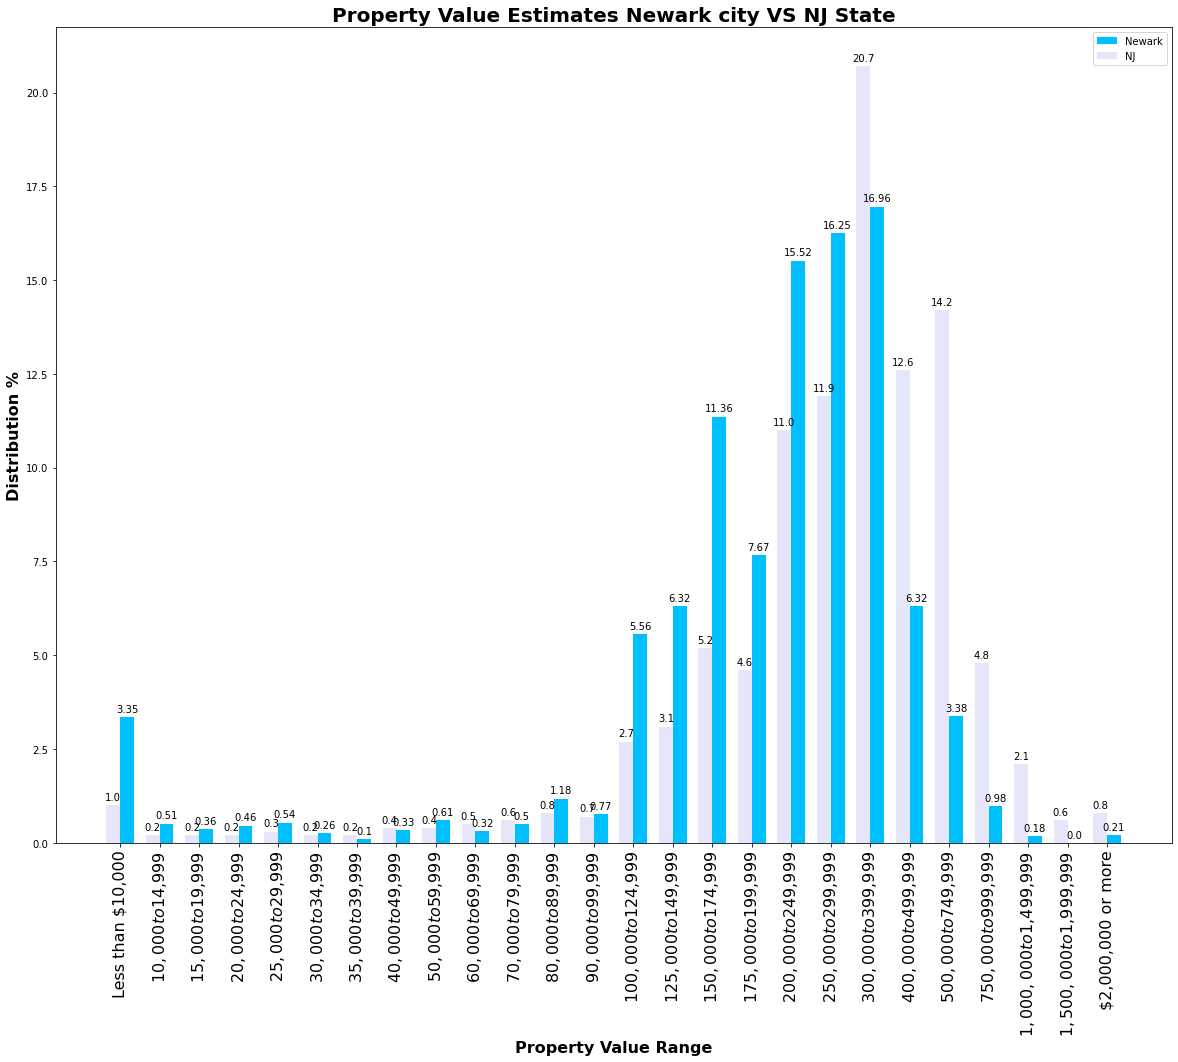

In [26]:
#Plot the Bar chart from the mobility data
x = np.arange(len(price_range_lst))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(20,15))

rects1 = ax.bar(x + width/2, nw_percent_lst, width, label='Newark', color='deepskyblue')
rects2 = ax.bar(x - width/2, nj_percent_lst, width, label='NJ', color='lavender')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Distribution %',fontsize=16, weight="bold")
ax.set_xlabel('Property Value Range',fontsize=16, weight="bold")
ax.set_title('Property Value Estimates Newark city VS NJ State',fontsize=20, weight="bold")
ax.set_xticks(x)
ax.set_xticklabels(price_range_lst, rotation=90,fontsize=16)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

ax.set_ylim(bottom=0)
#fig.tight_layout()
plt.show()
fig.savefig('Housing_Output/PropertyValue_Chart.png', bbox_inches="tight")